In [142]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
from tensorflow.python.framework import ops

%matplotlib inline

## Testing the package working or not
###  - test tensorflow and pandas 

In [143]:
df = pd.read_excel('BTC daily_database.xlsx', sheet_name=3)
# testing the input is correct or not
print(df.head())

        Date  Price        RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
0 2011-12-16   3.25  51.415094           0.591527  1.594689   0.500194   
1 2011-12-18   3.25  44.324324           0.516482  1.489778   0.571086   
2 2011-12-19   3.50  51.196172           1.311777  1.473728   1.266368   
3 2011-12-20   4.75  82.269504           3.461711  1.840524   3.831441   
4 2011-12-21   4.38  75.324675           2.180044  1.969366   2.760808   

   actions  y-hat  Unnamed: 8   Unnamed: 9  
0      NaN      2           1  2157.000000  
1      NaN      2           1     0.912437  
2      NaN      2           1          NaN  
3      NaN      2           1          NaN  
4      NaN      2           1          NaN  


In [144]:
w = tf.Variable(0,dtype=tf.float32)
cost = tf.add(tf.add(w**2,tf.multiply(-10.,w)),25)
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(w))

0.0


In [145]:
sess.run(train)
print(sess.run(w))

0.099999994


In [146]:
for i in range(1000):
    sess.run(train)
print(sess.run(w))

4.9999886


## Input dataframe

In [147]:
inputX = df.iloc[:,2:6 ].as_matrix()
inputX = inputX.T
inputY = df.iloc[:, 7:8].as_matrix()
inputY = inputY.T
print("X_train shape: " + str(inputX.shape))
print("number of training samples = "+ str(inputX.shape[1]))
print("number of variables = " + str(inputX.shape[0]))
print(inputX)

X_train shape: (4, 2363)
number of training samples = 2363
number of variables = 4
[[51.41509434 44.32432432 51.19617225 ... 41.54757836 54.30118701
  52.88985174]
 [ 0.59152723  0.51648236  1.31177743 ... -0.22095621 -0.06774514
   0.05516699]
 [ 1.59468902  1.48977812  1.47372773 ... -0.43278934 -0.33627381
  -0.24796018]
 [ 0.50019378  0.57108639  1.26636805 ... -1.09502132 -1.03113801
  -0.98767088]]


C:\Users\john liu\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\john liu\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
inputY

array([[2, 2, 2, ..., 2, 2, 2]], dtype=int64)

## layer size 

In [149]:
n_x = inputX.shape[0] # size of input layer
n_h = 5
n_y = inputY.shape[0]
print("n_x's shape = " + str(n_x))
print("first layer(n_h)'s shape = " + str(n_h))
print("n_y's output = " + str(n_y))

n_x's shape = 4
first layer(n_h)'s shape = 5
n_y's output = 1


## Create placeholder


In [150]:
def create_placeholders(n_x, n_y):
    
    #Creates the placeholders for the tensorflow session.
    
    X = tf.placeholder(tf.float32, shape = [n_x,None])
    Y = tf.placeholder(tf.float32, shape = [n_y, None])  
    return X, Y

In [151]:
X, Y = create_placeholders(n_x,n_y)
print ("X = " + str(X))
print(X.shape)
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(4, ?), dtype=float32)
(4, ?)
Y = Tensor("Placeholder_3:0", shape=(1, ?), dtype=float32)


## Initialize parameters

In [340]:

def initialize_parameters(n_x, n_h):
    #Initializes weight parameters to build a neural network with tensorflow  
    #tf.set_random_seed()                              
    W1 = tf.get_variable("W1", [n_h,n_x], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b1 = tf.get_variable("b1", [n_h,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10, n_h], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b2 = tf.get_variable("b2", [10, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [25, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b3 = tf.get_variable("b3", [25, 1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [10, 25], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b4 = tf.get_variable("b4", [10,1], initializer = tf.zeros_initializer())
    W5 = tf.get_variable("W5", [5, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b5 = tf.get_variable("b5", [5,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5}

    return parameters

In [341]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters(n_x, n_h)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))
    print("W4 = " + str(parameters["W4"]))
    print("b4 = " + str(parameters["b4"]))
    print("W5 = " + str(parameters["W5"]))
    print("b5 = " + str(parameters["b5"]))

W1 = <tf.Variable 'W1:0' shape=(5, 4) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(5, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(10, 5) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(10, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(25, 10) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(25, 1) dtype=float32_ref>
W4 = <tf.Variable 'W4:0' shape=(10, 25) dtype=float32_ref>
b4 = <tf.Variable 'b4:0' shape=(10, 1) dtype=float32_ref>
W5 = <tf.Variable 'W5:0' shape=(5, 10) dtype=float32_ref>
b5 = <tf.Variable 'b5:0' shape=(5, 1) dtype=float32_ref>


## One hot matrix

In [342]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices = labels, depth = C,axis  =0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot

In [343]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


## Convert Y-hat to softmax matrix

In [344]:
Y = one_hot_matrix(inputY, C = 5)
print("Y = ")
print(Y)
print("Y-shape = " + str(Y.shape))

Y = 
[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]
Y-shape = (5, 1, 2363)


## Forward Propagation

In [345]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3", "W4", "b4"
                  the shapes are given in initialize_parameters

    Returns:
    Z4 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5'] 
    
    
                                                                     # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X) , b1 )                               # Z1 = np.dot(W1,  X) + b1
    A1 = tf.nn.tanh(Z1)                                              # A1 = sigmoid(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2 )                               # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.tanh(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2), b3)                                # Z3 = np.dot(W3, A2) + b3
    A3 = tf.nn.tanh(Z3)                                              # A3 = relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3), b4)                                # Z4 = np.dot(W4, A3) + b4 
    A4 = tf.nn.tanh(Z4)                                              # A4 = relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4), b5)                                # Z5 = np.dot(W5, A4) + b5 
    return Z5

## Compute Cost

In [346]:
def compute_cost(Z5, Y):
    """
    Computes the cost
    
    Arguments:
    Z4 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z4
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z5)
    labels = tf.transpose(Y)
    
    #compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [347]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(4, 1)
    parameters = initialize_parameters(4,1)
    Z4 = forward_propagation(X, parameters)
    cost = compute_cost(Z4, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [348]:

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = Y[:, num_complete_minibatches*mini_batch_size : m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [349]:
def test(X,Y):
    m = X.shape
    n = Y.shape
    return m, n
test(inputX,inputY)

((4, 2363), (1, 2363))

In [350]:
mini_batches = random_mini_batches(inputX, inputY, 64, seed=0)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the last mini_batch_X: " + str(mini_batches[-1][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("shape of the last mini_batch_Y: " + str(mini_batches[-1][1].shape))
print ("mini batch sanity check: ")
mini_batches[0][1]


shape of the 1st mini_batch_X: (4, 64)
shape of the 2nd mini_batch_X: (4, 64)
shape of the 3rd mini_batch_X: (4, 64)
shape of the last mini_batch_X: (4, 59)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 64)
shape of the last mini_batch_Y: (1, 59)
mini batch sanity check: 


array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]],
      dtype=int64)

## Building the model 

In [351]:
def model(X, Y, learning_rate = 0.1,
          num_epochs = 1500, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X.shape                                # (n_x: input size, m : number of examples in the train set)
    n_y = Y.shape[0]                                  # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h)

    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z4 = forward_propagation(X, parameters)

    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z4,Y)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:

        # Run the initialization
        sess.run(init)

        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(inputX, inputY, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z4), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Test Accuracy:", accuracy.eval({X: inputX, Y: inputY}))

        return parameters

Cost after epoch 0: 17.318079
Cost after epoch 100: 17.210659
Cost after epoch 200: 17.192561
Cost after epoch 300: 17.177298
Cost after epoch 400: 17.164774
Cost after epoch 500: 17.151230
Cost after epoch 600: 17.135504
Cost after epoch 700: 17.118442
Cost after epoch 800: 17.101338
Cost after epoch 900: 17.084198
Cost after epoch 1000: 17.070156
Cost after epoch 1100: 17.054154
Cost after epoch 1200: 17.044702
Cost after epoch 1300: 17.031670
Cost after epoch 1400: 17.014822


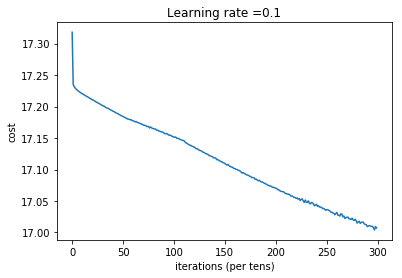

Parameters have been trained!
Test Accuracy: 0.0


In [353]:
# run the model 
parameters = model(inputX, inputY)